# Versuch 10
## Siedediagramm einer binären Mischung
Zu Beginn werden alle für die Auswertung notwendigen Module importiert. Welche Module könntet ihr wie üblich für die Auswertung brauchen? Die allgemeinen bereits bekannten und vorausgetzten Python-Kompetenzen könnt ihr unter [Anforderungen.ipynb](Anforderungen.ipynb) nachlesen. Dort sind auch einige Ratschläge bspw. zum Exportieren von Grafiken oder Hinweise zu <code>NumPy</code> aufgeführt.

Falls euch nachträglich Module einfallen, könnt ihr diese jederzeit hier ergänzen. Achtet dabei aber darauf, den entsprechenden Code dann auch erneut auszuführen!

In [1]:
from Hilfsdateien.importe_Bibliotheken import *

Außerdem könnten einige Naturkonstanten später in der Auswertung hilfreich sein. Diese können wir aus <code>scipy.constants</code> importieren. Hilfreich kann außerdem sein, weitere Konstanten wie den Studentschen $t$-Wert zu Beginn zu definieren.

In [2]:
from Hilfsdateien.importe_Konstanten import *
import numpy.ma as ma

M_Diox,M_Wasser = 88.11/1000,18.001/1000 #kg/mol
rho_Diox,rho_Wasser = 1034,1000 #kg/m^3

## Erster Auswertungsschritt
Wie üblich wollen wir zunächst alle unsere Messdaten einlesen. Mit welchem Befehl geschieht dies üblicherweise? Idealerweise besteht unser Datensatz aus einer Datei, in der eine Spalte die Temperatur und je eine Spalte die Brechungsindizes in den verschiedenen Aggregatzuständen bzw. Phasen enthält. Wenn ihr mögt, kann auch die Messnummer enthalten sein. Außerdem sollte ein 2D-Array erstellt werden, in dem jeweils das Volumen an Wasser und 1,4-Dioxan enthalten ist.

In [3]:
data = np.genfromtxt("data_v9/data.txt",usecols=(1,2,3,4),skip_header=1)

In der nachfolgenden Auswertung werden wir oft den Messwert des Brechungsindex von reinem Dioxan und Wasser benötigen. Diese müsst ihr hier aus euren Messwerten als Variablen definieren. Auch sollte ein Array erstellt werden, welches die _Gesamtvolumina_ während der einzelnen Messungen enthält.

In [4]:
n_Diox = 1.423
n_Wasser = 1.333
V_ges = 10.00
#V_ges = np.array([10.00,10.05,10.15,10.25,10.45,10.95,11.95,12.95,13.95,15.95,17.95,19.95,21.95,10.00,10.5,11.5,12.5]) #mL

Außerdem soll eine Kalibrierfunktion des Volumens $V_1$ der Komponente 1 als Funktion des Brechnungsindex $n$ nach
\begin{align}
V_1(n) = a\cdot n^2 + b\cdot n + c
\end{align}
erstellt werden. Die Fittingvariablen $a$, $b$ und $c$ sollen nur von einem Parameter $P_3$ abhängen und sind folgendermaßen definiert:
\begin{align}
    a &= \frac{V_\mathrm{ges}}{(n_1 - n_2)\cdot (n_1 - P_3)} \\
    b &= -(n_2 + P_3)\cdot a \\
    c &= n_2\cdot a \cdot P_3
\end{align}

Hieraus sollt ihr für eine Funktion des Stoffmengenanteils $x_1(n)$ nach der Gleichung
\begin{align}
    x_1(n) = \frac{n^2 + \alpha\cdot n + \beta}{\gamma\cdot n^2 + \alpha\cdot\gamma\cdot n + \delta}
\end{align}
mit
\begin{align}
    \alpha &= \frac{b}{a} \\
    \beta &= \frac{c}{a} \\
    \gamma &= 1 - \frac{\rho_2 \cdot M_1}{\rho_1\cdot M_2} \\
    \delta &= \beta\cdot\gamma + \frac{V_\mathrm{ges}}{a}\cdot (1-\gamma) 
\end{align}.

Hierbei handelt es sich nicht mehr um eine einfache lineare Regression, sodass wir am besten den Befehl <code>curve_fit</code> aus <code>scipy.optimize</code> zum Fitten nutzen. Für dieses Modul müssen wir zunächst die Funktionen definieren, was nun eure Aufgabe ist. Größen wie die Dichten und molaren Massen sind in der Literatur zu suchen und müssen an die Funktion als Variablen übergeben werden!

In [5]:
def v1(n,P3):
    a = V_ges[0]/((n_Diox-n_Wasser)*(n_Diox-P3))
    b = -(n_Wasser+P3)*a
    c = n_Wasser*P3*a
    return a*n**2 + b*n + c


Diese Funktion kann nun an <code>curve_fit</code> zusammen mit den $x$- und $y$-Werten übergeben werden. Die Kovarianzmatrix kann leicht in die Standardabweichung über eine einfache Beziehung (die auch in der Dokumentation steht) umgewandelt werden.

In [6]:
#Auskommentiert, da Datensatz fehlt
#popt,pcov = curve_fit(v1,x,y)
#perr = np.sqrt(np.diag(pcov)) #t-Wert muss eigtl. noch einbezogen werden

## Zweiter Auswertungsschritt
Nun können wir die Daten aus der Fittingfunktion an eine neue Funktion übergeben, welche uns bei einem bestimmten Brechungsindex den Stoffmengenanteil der Komponente 1 ausgibt. Anders als unsere Kalibrierfunktion, soll diesmal SymPy genutzt werden, da hierdurch die Fehlerrechnung für uns leichter wird.

Für SymPy müssen die einzelnen Variablen einer Funktion $f(a,b,c,\dots)$ erst als Symbole definiert werden, bevor die entsprechenden Variablen von SymPy genutzt werden können. Im Anschluss könnt ihr eine Variable erstellen, welche wie die von uns gewünschte Funktion heißt und aus den als Symbolen definierten Funktionsvariablen berechnet wird. Dies ist nun eure Aufgabe. Von dieser Funktion könnt ihr dann die Ableitung nach der entsprechenden Variablen bilden&nbsp;– dies wrd euch bei der Gauß’schen Fehlerfortpflanzung helfen! Die Unsicherheit von $x_1$ könnt ihr so ebenfalls als eine Funktion definieren. 

Nachdem die Ausdrücke mittels eines weiteren SymPy-Befehls in aufrufbare Funktionen überführt wurden (GIYF, eine [anonyme Funktion](https://de.wikipedia.org/wiki/Anonyme_Funktion) wird oftmals lambda-Funktion genannt!), können direkt die Werte an die Funktion übergeben werden.

In [7]:
############################################################################################################################################
#Mangels gegebener Daten muss aus Werte aus älteren Protokollen zurückgefriffen werden, welche nachfolgend als Variablen aufgeführt sind!
#########################################################################################################################################
a,b,c =290.23876, -687.6743, 400.930554


n,dn,alph,bet,gamm,delt = symbols("n Δn α β γ δ")
x1 = (n**2 + alph*n + bet)/(gamm*n**2 + alph*gamm*n + delt)
dx1 = sqrt((diff(x1,n)*dn)**2)

alpha = b/a
beta = c/a
gamma = 1-(rho_Wasser*M_Diox)/(rho_Diox*M_Wasser)
delta = gamma*beta + V_ges/a*(1-gamma)
print(delta)
x1 = lambdify([n,alph,bet,gamm,delt],x1,'scipy')
dx1 = lambdify([n,dn,alph,bet,gamm,delt],dx1,'scipy')
#popt,pcov = curve_fit(v1,n_arr,V_1_arr)

-4.994675811151134


Nachdem wir nun mit SymPy eine aufrufbare Funktion erstellt haben, können wir ausgehend von den Brechungsindizes den Stoffmengenanteil $x_1$ in der Gasphase und in der Flüssigkeit bestimmen. Es bietet sich an, jeweils immer den Mittelwert der einzelnen Messungen einzusetzen.

In [8]:
x1_gas = x1(data[:,1],alpha,beta,gamma,delta)
x1_liq = x1(np.mean(np.array([data[:,3],data[:,2]]),axis=0),alpha,beta,gamma,delta)

Eure Aufgabe ist es nun, das Siedediagramm zu erstellen, also die Temperatur gegen den Stoffmengenanteil von Dioxan aufzutragen. Dieses würde allerdings nicht sinnvoll aussehen, solange die Stoffmengenanteile nicht nach der Größe sortiert sind. Würdet ihr allerdings nur das Array mit $x_1$ sortieren, würde die Zuordnung von $T$ zu $x_1$ nicht mehr stimmen. Folglich müsst ihr euch anstelle des sortierten Arrays für $x_1$ ein Array ausgeben lassen, in dem der Index der Einträge steht. Hierfür gibt es einen NumPy-Befehl, den ihr durch eine Internetrecherche finden könnt.

In [9]:
#Die Indizes, die ein sortiertes Array ergeben
index_gas = np.argsort(x1_gas)
index_liq = np.argsort(x1_liq)

#Wir überschreiben x1_ mit dem sortierten x1_-Array 
x1_gas = x1_gas[index_gas]
x1_liq = x1_liq[index_liq]

#Nun die Unsicherheit
dx1_gas = dx1(data[index_gas,1],0.001,alpha,beta,gamma,delta)
dx1_liq = dx1(np.mean(np.array([data[index_liq,3],data[index_liq,2]]),axis=0),0.001,alpha,beta,gamma,delta)

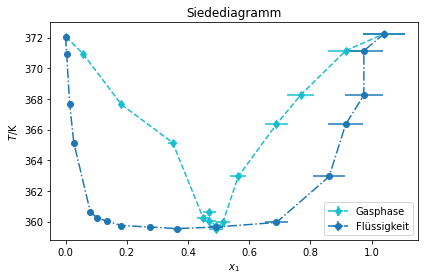

In [23]:
#Es ist wichtig, dass index_ bei dem Array mit der Temperatur übergeben wird
plt.errorbar(x1_gas,data[index_gas,0]+273.15,xerr=dx1_gas,yerr=0.1,ls='--',marker='d',label="Gasphase",color='tab:cyan')
plt.errorbar(x1_liq,data[index_liq,0]+273.15,xerr=dx1_liq,yerr=0.1,ls='-.',marker="o",label="Flüssigkeit",color='tab:blue')
plt.legend()
plt.ylabel(r"$T$/K")
plt.xlabel(r"$x_1$")
plt.title(r"Siedediagramm")
plt.tight_layout()
plt.show()
plt.close()

Der azeotrope Punkt ist der Punkt, an dem die beiden Kurven sich im Idealfall schneiden. Alternativ könnte man auch das Minimum bspw. von der Kurve der Gasphase bestimmen. Schätzt sinnvoll die Unsicherheit ab!

Eine weitere Möglichkeit ist, eine Gerade des Typs $x_{1,\mathrm{gas}} = x_{1,\mathrm{liq}}$ zu erstellen und den Schnittpunkt der Messwerte in einer Auftragung von $x_{1,\mathrm{gas}}$ gegen $x_{1,\mathrm{liq}}$ mit dieser Geraden zu bestimmen. 

Hierzu sollte eine Ausgleichsgerade über die Messwerte bestimmt werden. Sinnvollerweile wird die lineare Regression _nicht_ über alle Messwerte durchgeführt sondern ein sinnvoller Bereich gewählt, über den eine lineare Regression durchgeführt wird. Eine Möglichkeit ist, die Werte innerhalb eines bestimmten Bereiches jeweils zu _extrahieren_. Stattdessen wollen wir aus NumPy das Konzept der [maskierten Arrays](https://numpy.org/doc/stable/reference/maskedarray.generic.html) mittels <code>np.ma.array</code> nutzen, es ist empfehlenswert einen Blick auf die Dokumentation zu werfen! An diesen Befehl wird das Ausgangsarray übergeben und ein weiteres Array, welches angibt, ob der Bereich zu maskieren ist, oder nicht. Ein maskierter Bereich ist noch immer im Array gespeichert, wird aber für weitere Befehle durch die Maske „verdeckt“. Zum besseren Verständnis ist unten ein interaktives Code-Beispiel aufgeführt, zum Ausführen immer „Run Interact“ drücken.

In [1]:
#Beispiel zum besseren Verständnis von maskierten Arrays
#Import nur, damit der Button für die Interaktivität vorhanden ist
from ipywidgets import interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

def update(maske,region,invertiert):
    x = np.linspace(0,42,10**3)
    y = 10 * x**2 * np.exp(-1/3*x)
    if maske == True:
        if invertiert != True:
            #Maskiert alle x-Werte in dem bestimmten Bereich
            x_plot = np.ma.masked_inside(x,region[0],region[1])
            #Wir wollen die Maske übernehmen
            y_plot = np.ma.array(y,mask=x_plot.mask)
        if invertiert == True:
            x_plot = np.ma.masked_inside(x,region[0],region[1])
            y_plot = np.ma.array(y,mask=~x_plot.mask)
            x_plot.mask = ~x_plot.mask
    elif maske == False:
        #Wenn die Maske nicht aktiv sein soll, soll auch nichts maskiert sein
        x_plot,y_plot = x,y
    plt.plot(x_plot,y_plot)
    plt.xlim(0,40)
    plt.ylim(0,50)
    plt.show()

#Zum Ausführen IMMER Run Interact drücken (der ist hier im Code nicht aufgeführt)
interact_manual(update,maske=widgets.ToggleButton(value=False,description="Maske?"),invertiert=widgets.ToggleButton(value=False,description="Maske invertieren?"),region=widgets.IntRangeSlider(value=[2,19],min=0,max=40,step=1,description='Maskierter Bereich',disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='d',))

interactive(children=(ToggleButton(value=False, description='Maske?'), IntRangeSlider(value=(2, 19), descripti…

<function __main__.update(maske, region, invertiert)>

In unserem Fall bietet es sich an, alle Wertepaare _außerhalb_ eines bestimmten Bereichs zu _maskieren_. Welchen NumPy-Befehl könntet ihr hierzu nutzen? Erstellt die Maske, welche alle Werte außerhalb eines bestimmten intervalls maskiert.

In [75]:
x_mask = ma.masked_inside(x1_liq,0.2,0.8)

[False False False False False False False False  True  True  True  True
 False False False False False]


Das ursprüngliche Array kann mit einem <code>arrayname.data</code> und die Maske mit <code>arrayname.mask</code> ausgegeben werden. Die Maske muss nun _korrekt_ auf unsere Messwerte angewandt werden. Die Maske ist <code>True</code>, wenn ein Wert maskiert ist und <code>False</code> wenn ein Wert nicht maskiert ist. Da wir aber nicht an den von der Maske verdeckten Werten interessiert sind, muss die Maske mit einer Tilde <code>~</code> invertiert werden. Danach kann diese invertierte Maske auf die von uns gewünschten Arrays angewandt werden. 

Extrahiert die Maske, invertiert sie und wendet sie auf die entsprechendne Arrays an! Zur Kontrolle könnt ihr eine Auftragung der maskierten Arrays gegeneinander durchführen.

In [87]:
y_arr_masked = x1_gas[x_mask.mask]
x_arr_masked = x1_liq[x_mask.mask]

Über dieses Array kann nun die lineare Regression durchgeführt werden.

In [88]:
masked_fit = linregress(x_arr_masked,y_arr_masked)

Erstellt nun zunächst die Auftragung. In dieser sollte bereits die soeben bestimmte Ausgleichgerade enthalten sein, sodass ein erstes Abschätzen des Ergebnis’ möglich ist.

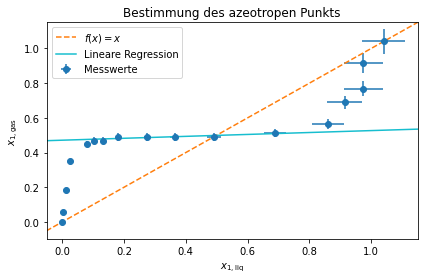

In [89]:
plt.errorbar(x1_liq,x1_gas,xerr=dx1_liq,yerr=dx1_gas,marker="o",ls="None",color='tab:blue',label="Messwerte")
plt.plot(np.arange(-0.1,1.2,1.0e-3),np.arange(-0.1,1.2,1.0e-3),"--",color='tab:orange',label="$f(x) = x$")
plt.plot(np.arange(-0.1,1.2,1.0e-3),np.arange(-0.1,1.2,1.0e-3)*masked_fit.slope+masked_fit.intercept,color="tab:cyan",label="Lineare Regression")
plt.xlabel(r"$x_{1,\mathrm{liq}}$")
plt.ylabel(r"$x_{1,\mathrm{gas}}$")
plt.xlim(-0.05,1.15)
plt.ylim(-0.1,1.15)
plt.title("Bestimmung des azeotropen Punkts")
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

Um den Schnittpunkt und damit den azeotropen Punkt präziser zu bestimmen, muss $x_{1,\mathrm{az}}$ am Schnittpunkt aus der Steigung $m$ und dem Ordinatenschnittpunkt $b$ bestimmt werden. Wie lautet die Gleichung hierzu? Näherungsweise könnt ihr mittels Gauß’scher Fehlerfortpflanzung könnt unter Zuhilfenahme von SymPy die Unsicherheit $\Delta x_{1,\mathrm{az}}$ bestimmen (da die Steigung und der Schnittpunkt nicht voneinander unabhängige Variablen sind, müsste eigentlich die Kovarianzmatrix eingesetzt werden).

In [15]:
slope,dslope,interc,dinterc = symbols("m Δm b Δb")
xaze = -interc/(slope-1)
dxaze = sqrt((diff(xaze,interc)*dinterc)**2 + (diff(xaze,slope)*dslope)**2)

xaze = lambdify([slope,interc],xaze,'scipy')
dxaze = lambdify([slope,dslope,interc,dinterc],dxaze,'scipy')

x_aze = xaze(masked_fit.slope,masked_fit.intercept)
dx_aze = dxaze(masked_fit.slope,masked_fit.stderr,masked_fit.intercept,masked_fit.intercept_stderr)

print("x_aze: "+ np.array2string(np.array([x_aze,dx_aze]),separator=" ± "))

x_aze: [0.499 ± 0.016]


## Dritter Auswertungsschritt
Mit Hilfe des Stoffmengenanteils $x_1$ sind nun die isobaren Aktiviätskoeffizienten $f_1$ und $f_2$ zu bestimmen. Diese können für eine Komponente $\iota$ aus den Stoffmengenanteilen $x_\iota^\mathrm{gas}$ bzw. $x_\iota^\mathrm{liq}$ in der Gasphase bzw. Flüssigkeit aus dem Gesamtdruck $p$ und dem Dampfdruck $p_\iota^*$ der reinen Komponente am Siedepunkt erhalten werden (siehe nachfolgende Gleichung)
\begin{align}
    f_\iota = \frac{x_\iota^\mathrm{gas}\cdot p_\mathrm{gas}}{x_\iota^\mathrm{liq}\cdot p_\iota^*}
\end{align}.

Den Dampfdruck $p_\iota^*$ müsst ihr der Literatur entnehmen. Nachfolgend wird ein Ansatz nach der Antoine-Gleichung bei einer Temperatur $T$ gewählt. Diese lautet
\begin{align}
    p_\iota^* = 10^{\left(A-\frac{B}{T+C}\right)},
\end{align}
die Konstanten $A, B, C$ müssen der Literatur entnommen werden. Es bietet sich an, erneut SymPy für die Implementierung der Funktion zu nutzen. $A$, $B$ und $C$ müssen erneut als „Symbole“ deklariert werden und erneut können wir mittels SymPy die Ableitungen für die Gauß’sche Fehlerfortpflanzung bestimmen.

In [16]:
A,B,C,T,dT = symbols('A B C T ΔT')
p_star = 10**5 * 10**(A-B/(T+C)) #Pa
dp_star = sqrt((diff(p_star,T)*dT)**2)

p_star = lambdify([A,B,C,T],p_star,'scipy')
dp_star = lambdify([A,B,C,T,dT],dp_star,'scipy')

p_star_wasser = p_star(5.08354,1663.125,-45.662,data[index_gas,0]+273.15)
dp_star_wasser = dp_star(5.08354,1663.125,-45.662,data[index_gas,0]+273.15,0.05)

p_star_dioxan = p_star(4.58135,1570.093,-31.297,data[index_gas,0]+273.15)
dp_star_dioxan = dp_star(4.58135,1570.093,-31.297,data[index_gas,0]+273.15,0.05)


Analog wird für $f_\iota$ und dessen Unsicherheit $\Delta f_\iota$ eine entsprechende Funktion mittels SymPy erstellt. Erneut sollte $\Delta f_\iota$ nicht manuell eingetippt werden, sondern ausgehend von $f_\iota$ mittels SymPy berechnet werden. 

In [17]:
xg,dxg,xl,dxl,pges,dpges,pstar,dpstar = symbols('x_g Δx_g x_l Δx_l p_ges Δp_ges p* Δp*')
f = xg*pges/(xl*pstar)
df = sqrt((diff(f,xg)*dxg)**2 + (diff(f,xl)*dxl)**2 + (diff(f,pges)*dpges)**2 + (diff(f,pstar)*dpstar)**2)

f = lambdify([xg,xl,pges,pstar],f,'scipy')
df = lambdify([xg,dxg,xl,dxl,pges,dpges,pstar,dpstar],df,'scipy')

f_Dioxan = f(x1_gas,x1_liq,10**5,p_star_dioxan)
df_Dioxan = df(x1_gas,dx1_gas,x1_liq,dx1_liq,10**5,100,p_star_dioxan,dp_star_dioxan)
f_Wasser = f(1-x1_gas,1-x1_liq,10**5,p_star_wasser)
df_Wasser = df(1-x1_gas,dx1_gas,1-x1_liq,dx1_liq,10**5,100,p_star_wasser,dp_star_wasser)

## Vierter Auswertungsschritt
Im nächsten Auswertungsschritt ist die Zusatzgibbsenergie $\mu_{\iota,\mathrm{E}}$ zu bestimmen. Diese wird nach der im Skript enthaltenen Gleichung
\begin{align}
    \mu_{\iota,\mathrm{E}} = R\cdot T\cdot\ln\left(f_\iota\right)
\end{align}
bzw. 
\begin{align}
    \mu_\mathrm{E} = R\cdot T\cdot\left(\sum_\iota x_\iota \cdot \ln\left(f_\iota\right)\right)
\end{align}
erhalten. Bestimmt $\mu_\mathrm{E}$ mittels SymPy! Es ist wichtig, dass _nicht_ <code>np.log</code> genutzt wird, stattdessen ist immer die entsprechende Funktion aus SymPy zu nutzen.

In [18]:
x1_var,dx1_var,x2,dx2,f1,df1,f2,df2 = symbols('x1 Δx1 x2 Δx2 f1 Δf1 f2 Δf2')

mu_E = R*T*(x1_var*log(f1) + x2*log(f2))
dmu_E = sqrt((diff(mu_E,T)*dT)**2 + (diff(mu_E,x1_var)*dx1_var)**2 + (diff(mu_E,x2)*dx2)**2 + (diff(mu_E,f1)*df1)**2 + (diff(mu_E,f2)*df2)**2)

mu_E = lambdify([x1_var,x2,f1,f2,T],mu_E,'scipy')
dmu_E = lambdify([x1_var,dx1_var,x2,dx2,f1,df1,f2,df2,T,dT],dmu_E,'scipy')

Als nächstes ist es von euch gefordert, $\mu_\mathrm{E}$ gegen $x_1$ aufzutragen. Wie immer: Fehlerbalken, Achsenbeschriftung, Titel, etc. nicht vergessen!

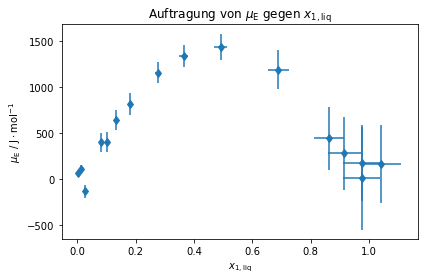

In [19]:
#Da der erste Wert von f negativ ist, werden nur alle Werte danach genommen

mu = mu_E(x1_liq[1:],1-x1_liq[1:],f_Dioxan[1:],f_Wasser[1:],data[1:,0]+273.15)
dmu = dmu_E(x1_liq[1:],dx1_liq[1:],1-x1_liq[1:],dx1_liq[1:],f_Dioxan[1:],df_Dioxan[1:],f_Wasser[1:],df_Wasser[1:],data[1:,0]+273.15,0.05)
plt.errorbar(x1_liq[1:],mu,yerr=dmu,xerr=dx1_liq[1:],marker='d',ls='None')
plt.xlabel("$x_{1,\mathrm{liq}}$")
plt.ylabel("$\mu_\mathrm{E}$ / $\mathrm{J}\cdot\mathrm{mol}^{-1}$")
plt.title("Auftragung von $\mu_\mathrm{E}$ gegen $x_{1,\mathrm{liq}}$")
plt.tight_layout()
plt.show()
plt.close()

## Fünfter Auswertungsschritt
Abschließend soll die Güte der Messergebnisse überprüft werden. Hierzu habt ihr das Integral
\begin{align}
    \int\limits_{0}^{1} \ln\left(\frac{f_1}{f_2}\right)\mathrm{d}x_{1,\mathrm{liq}}
\end{align}
zu bestimmen. Dieses liegt für ideale Messwerte bei null. Da unsere realen Messwerte jedoch keiner Funktion gehorchen, über die wir integrieren können, werden wir stattdessen eine numerische Integration nach der [Trapezregel](https://www.spektrum.de/lexikon/mathematik/numerische-integration/9304) durchführen. Hierzu wird der Befehl <code>trapz</code> aus <code>scipy.integrate</code> genutzt, welcher uns das Ergebnis nach der entsprechenden Regel liefert.

Zunächst sollte jedoch $\ln\left(\frac{f_1}{f_2}\right)$ und die Unsicherheit von diesem Bruch ermittelt werden, da außerdem eine Auftragung von $\ln\left(\frac{f_1}{f_2}\right)$ gegen $x_{1,\mathrm{liq}}$ erwünscht ist. Hierzu kann erneut SymPy genutzt werden.

In [20]:
logy = log(f1/f2)
dlogy = sqrt((diff(logy,f1)*df1)**2 + (diff(logy,f2)*df2)**2)

logy = lambdify([f1,f2],logy,'scipy')
dlogy =lambdify([f1,df1,f2,df2],dlogy,'scipy')

log_y = logy(f_Dioxan[1:],f_Wasser[1:])
dlog_y = dlogy(f_Dioxan[1:],df_Dioxan[1:],f_Wasser[1:],df_Wasser[1:])
#integral = trapz(np.log(f1/f2),x1)

Als letzter Schritt soll erneut eine Auftragung angefertigt werden.

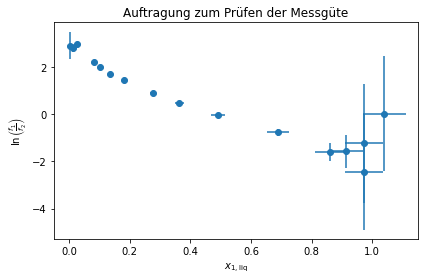

In [21]:
plt.errorbar(x1_liq[1:],log_y,yerr=dlog_y,xerr=dx1_liq[1:],marker='o',ls="None")
plt.xlabel(r"$x_{1,\mathrm{liq}}$")
plt.ylabel(r"$\ln\left(\frac{f_1}{f_2}\right)$")
plt.xlim(-0.05,1.15)
plt.title("Auftragung zum Prüfen der Messgüte")
plt.tight_layout()
plt.show()
plt.close()

Mittels der Trapzeregel soll nun das Integral bestimmt werden. Hierbei werden die Unsicherheiten der Messgrößen ignoriert, deren Berücksichtigung jedoch _nicht_ trivial ist.

In [22]:
integral = trapz(x1_liq[1:],log_y)
print(integral)

-0.03738475127235841


---
Arved Dorst, Göttingen, __2021__.